# Taxpayer

<b>About the Data</b>
<p>The dataset contains information about US taxpayers. There are 10 independent columns and 1 dependent column. This dataset includes attributes like household income, household debt level, if the taxpayer is married or not, how many cars their household has, if they filed their taxes in the last three years or not. </p>

<b>Data Description:</b>
<ul>
  <li>HHI: Household income</li>
  <li>HHDL: Household debt level</li>
  <li>Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.</li>
  <li>PoliticalParty: Name of the political party</li>
  <li>CollegeGrads: Grade in College out of 5</li>
  <li>AHHAge: Average household age</li>
  <li>cars: number of cars in house</li>
  <li>Filed in YYYY: Tax filed in given year YYYY</li>
</ul>


## Import

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
import pandas as pd
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [3]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [4]:
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [5]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [6]:
tax_data.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             803 non-null    int64 
 1   HHDL            803 non-null    int64 
 2   Married         803 non-null    int64 
 3   CollegGrads     803 non-null    int64 
 4   AHHAge          803 non-null    int64 
 5   Cars            803 non-null    int64 
 6   Filed in 2017   803 non-null    int64 
 7   Filed in 2016   803 non-null    int64 
 8   Filed in 2015   803 non-null    int64 
 9   PoliticalParty  803 non-null    object
dtypes: int64(9), object(1)
memory usage: 62.9+ KB


In [8]:
tax_data.PoliticalParty.value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

<AxesSubplot:>

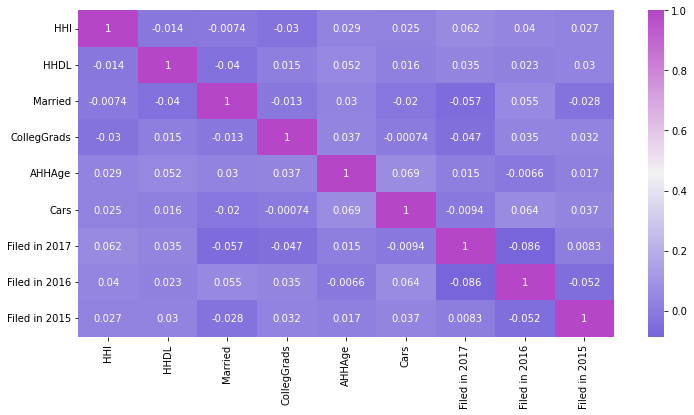

In [9]:
color = sns.diverging_palette(270, 300, as_cmap = True)
plt.figure(figsize=(12,6))
sns.heatmap(tax_data.corr(), cmap=color, annot=True)

## Spliting Data 

In [10]:
x = tax_data.iloc[:,0:9]
y = tax_data['PoliticalParty']

In [11]:
x.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,183414,-12402,1,2,28,1,0,0,1
1,129786,700251,2,5,63,3,0,0,0
2,268343,493411,2,4,44,1,1,0,1
3,290506,-433408,1,1,28,5,1,0,1
4,90108,907135,1,3,57,5,1,1,0


In [12]:
y.head()

0       Democrat
1     Republican
2    Independent
3     Republican
4       Democrat
Name: PoliticalParty, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1, n_estimators=10, max_depth = 5, n_jobs=-1)

## Random Forest 

In [15]:
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1, random_state=1)

In [16]:
forest.predict(x_test)

array(['Republican', 'Republican', 'Independent', 'Republican',
       'Republican', 'Democrat', 'Democrat', 'Independent', 'Democrat',
       'Republican', 'Democrat', 'Democrat', 'Independent', 'Republican',
       'Democrat', 'Republican', 'Republican', 'Independent',
       'Independent', 'Democrat', 'Independent', 'Independent',
       'Republican', 'Independent', 'Republican', 'Democrat', 'Democrat',
       'Democrat', 'Independent', 'Independent', 'Republican', 'Democrat',
       'Democrat', 'Democrat', 'Democrat', 'Independent', 'Independent',
       'Independent', 'Democrat', 'Independent', 'Independent',
       'Independent', 'Independent', 'Republican', 'Republican',
       'Republican', 'Democrat', 'Independent', 'Democrat', 'Independent',
       'Democrat', 'Independent', 'Independent', 'Democrat', 'Republican',
       'Democrat', 'Republican', 'Republican', 'Democrat', 'Republican',
       'Independent', 'Democrat', 'Republican', 'Independent', 'Democrat',
       'Indepen

In [17]:
forest.score(x_train, y_train)

0.6214953271028038

In [18]:
forest.score(x_test, y_test)

0.36645962732919257

## Testing Data

In [19]:
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [20]:
test_data.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,253274,-633752,2,1,94,3,0,1,1
1,47107,322850,0,1,30,2,1,1,0
2,111874,300583,0,2,46,3,0,1,1
3,96670,107419,0,3,77,5,0,0,0
4,128669,341273,0,0,92,4,1,1,1


In [21]:
target = forest.predict(test_data)
res = pd.DataFrame(target)
res.index = test_data.index
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index=False)